In [1]:
import sys
import pandas as pd 
import numpy as np
#np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import plotly.express as px
%matplotlib inline

In [2]:
parent_dir = os.path.abspath(r'D:')
output_dir = os.path.join(parent_dir, 'processed_data', 'ModelingData')

big_train_path = os.path.join(output_dir, 'big_train.parquet')
big_train_df = pd.read_parquet(big_train_path)

big_test_path = os.path.join(output_dir, 'big_test.parquet')
big_test_df = pd.read_parquet(big_test_path)



In [3]:
columns_to_drop = [
    'wind_speed_mean', 'yaw_error_mean', 'Turbulence',
    'tip_deflection_edge_V1_mean', 'tip_deflection_edge_V2_mean',
    'tip_deflection_edge_V3_mean', 'tip_deflection_flap_V1_mean',
    'tip_deflection_flap_V2_mean', 'tip_deflection_flap_V3_mean',
    'tower_deflection_Y_mean', 'tower_deflection_Z_mean',
    'wind_speed_max', 'wind_speed_median', 'wind_speed_min',
    'wind_speed_q1', 'wind_speed_q3', 'wind_speed_std',
    'yaw_error_max', 'yaw_error_median', 'yaw_error_min',
    'yaw_error_q1', 'yaw_error_q3', 'yaw_error_std',
    'tip_deflection_edge_V1_max', 'tip_deflection_edge_V1_median',
    'tip_deflection_edge_V1_min', 'tip_deflection_edge_V1_q1',
    'tip_deflection_edge_V1_q3', 'tip_deflection_edge_V1_std',
    'tip_deflection_edge_V2_max', 'tip_deflection_edge_V2_median',
    'tip_deflection_edge_V2_min', 'tip_deflection_edge_V2_q1',
    'tip_deflection_edge_V2_q3', 'tip_deflection_edge_V2_std',
    'tip_deflection_edge_V3_max', 'tip_deflection_edge_V3_median',
    'tip_deflection_edge_V3_min', 'tip_deflection_edge_V3_q1',
    'tip_deflection_edge_V3_q3', 'tip_deflection_edge_V3_std',
    'tip_deflection_flap_V1_max', 'tip_deflection_flap_V1_median',
    'tip_deflection_flap_V1_min', 'tip_deflection_flap_V1_q1',
    'tip_deflection_flap_V1_q3', 'tip_deflection_flap_V1_std',
    'tip_deflection_flap_V2_max', 'tip_deflection_flap_V2_median',
    'tip_deflection_flap_V2_min', 'tip_deflection_flap_V2_q1',
    'tip_deflection_flap_V2_q3', 'tip_deflection_flap_V2_std',
    'tip_deflection_flap_V3_max', 'tip_deflection_flap_V3_median',
    'tip_deflection_flap_V3_min', 'tip_deflection_flap_V3_q1',
    'tip_deflection_flap_V3_q3', 'tip_deflection_flap_V3_std',
    'tower_deflection_Y_max', 'tower_deflection_Y_median',
    'tower_deflection_Y_min', 'tower_deflection_Y_q1',
    'tower_deflection_Y_q3', 'tower_deflection_Y_std',
    'tower_deflection_Z_max', 'tower_deflection_Z_median',
    'tower_deflection_Z_min', 'tower_deflection_Z_q1',
    'tower_deflection_Z_q3', 'tower_deflection_Z_std'
]

In [4]:
def split_data(df, target_variable, columns_to_drop):
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_variable]
    return X, y


485/485 [==============================] - 0s 812us/step
Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 100, 50)
Training MAE: 1.8748480900333762
Training MSE: 11.080296749664067
Training RMSE: 3.3287079700184075
Training R2: 0.92086784600101

Test MAE: 2.6886936515193356
Test MSE: 22.24875633440759
Test RMSE: 4.716858735896973
Test R2: 0.8411006335080332



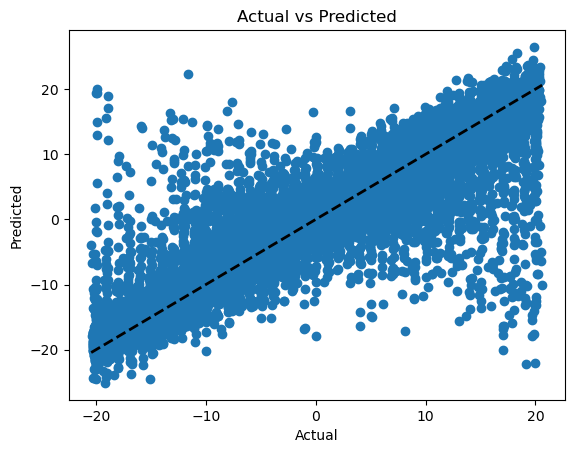

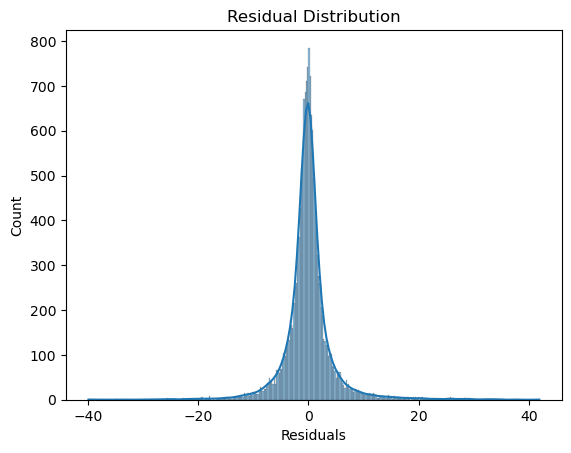

In [5]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def split_data(data, target_variable, columns_to_drop):
    X = data.drop(columns=[target_variable] + columns_to_drop)
    y = data[target_variable]
    return X, y

targets = ['yaw_error_mean']

hidden_layer_sizes_list = [(100, 100, 100, 100, 50)]

for target_variable in targets:
    X_train, y_train = split_data(big_train_df, target_variable, columns_to_drop)
    X_test, y_test = split_data(big_test_df, target_variable, columns_to_drop)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for hidden_layer_sizes in hidden_layer_sizes_list:
        model = keras.Sequential([
            keras.layers.Dense(hidden_layer_sizes[0], activation='relu', input_shape=(X_train_scaled.shape[1],)),
            keras.layers.Dense(hidden_layer_sizes[1], activation='relu'),
            keras.layers.Dense(hidden_layer_sizes[2], activation='relu'),
            keras.layers.Dense(hidden_layer_sizes[3], activation='relu'),
            keras.layers.Dense(hidden_layer_sizes[4], activation='relu'),
            keras.layers.Dense(1)  # Output layer
        ])
        
        model.compile(optimizer='adam', loss='mean_squared_error')
        history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)
        
        train_predictions = model.predict(X_train_scaled).flatten()
        test_predictions = model.predict(X_test_scaled).flatten()
        
        train_mae = mean_absolute_error(y_train, train_predictions)
        train_mse = mean_squared_error(y_train, train_predictions)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, train_predictions)
        
        test_mae = mean_absolute_error(y_test, test_predictions)
        test_mse = mean_squared_error(y_test, test_predictions)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, test_predictions)
        
        print("Target Variable:", target_variable)
        print("Hidden Layer Sizes:", hidden_layer_sizes)
        print("Training MAE:", train_mae)
        print("Training MSE:", train_mse)
        print("Training RMSE:", train_rmse)
        print("Training R2:", train_r2)
        print()
        print("Test MAE:", test_mae)
        print("Test MSE:", test_mse)
        print("Test RMSE:", test_rmse)
        print("Test R2:", test_r2)
        print()
        
        
        plt.scatter(y_test, test_predictions)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        plt.title("Actual vs Predicted")
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.show()
        
        # Residual plot
        residuals = y_test - test_predictions
        sns.histplot(residuals, kde=True)
        plt.title("Residual Distribution")
        plt.xlabel("Residuals")
        plt.show()


## Different relu', 'sigmoid', 'tanh

485/485 [==============================] - 0s 803us/step
Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 100, 50)
Activation Function: relu
Training MAE: 2.0502962902169033
Training MSE: 12.493265215218681
Training RMSE: 3.534581335210534
Training R2: 0.9107768492760917

Test MAE: 2.7622488922564976
Test MSE: 20.772397462807145
Test RMSE: 4.557674567452918
Test R2: 0.8516447055400196



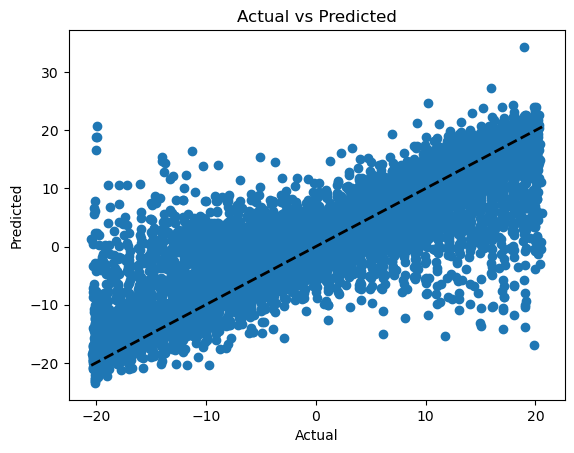

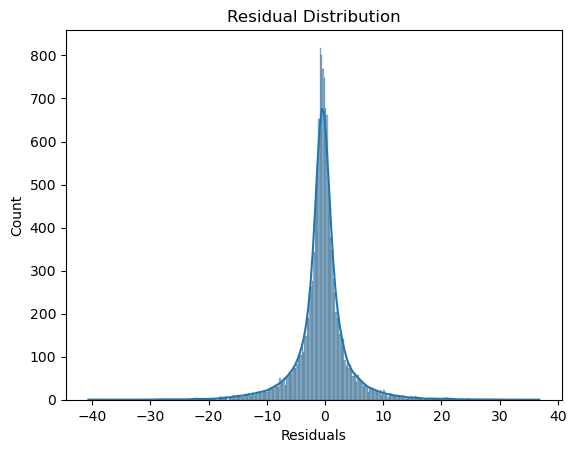

485/485 [==============================] - 0s 973us/step
Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 100, 50)
Activation Function: sigmoid
Training MAE: 2.640183632665711
Training MSE: 20.23305832127391
Training RMSE: 4.498117197369796
Training R2: 0.8555015697573142

Test MAE: 3.1946674777594706
Test MSE: 28.647453195918484
Test RMSE: 5.352331566328686
Test R2: 0.7954015003795976



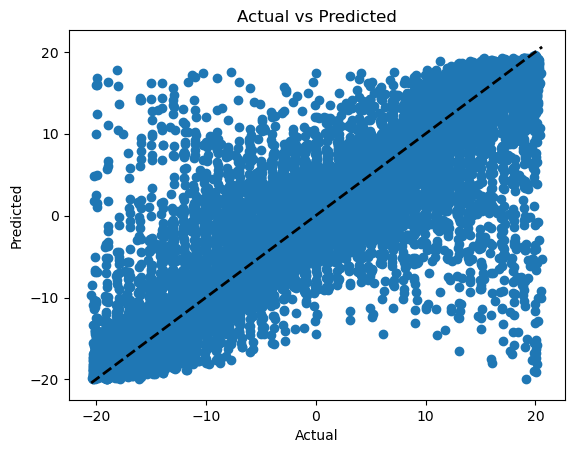

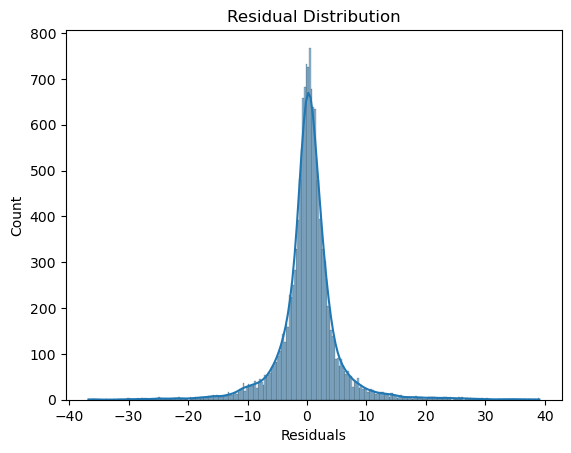

485/485 [==============================] - 0s 785us/step
Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 100, 50)
Activation Function: tanh
Training MAE: 2.128330194582245
Training MSE: 11.984280321671894
Training RMSE: 3.4618319314593964
Training R2: 0.9144118666307058

Test MAE: 3.2035981807008196
Test MSE: 26.24930688792378
Test RMSE: 5.123407741720717
Test R2: 0.8125289264418847



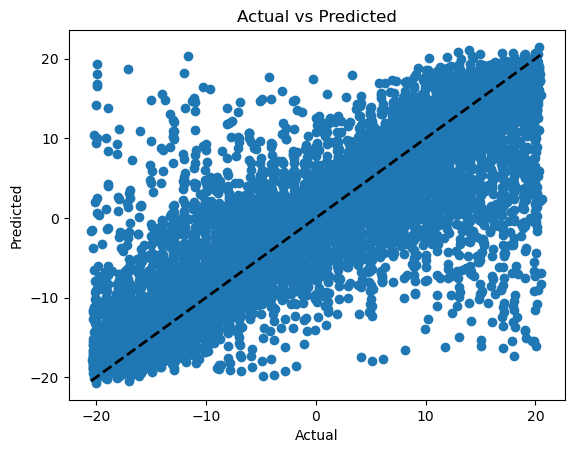

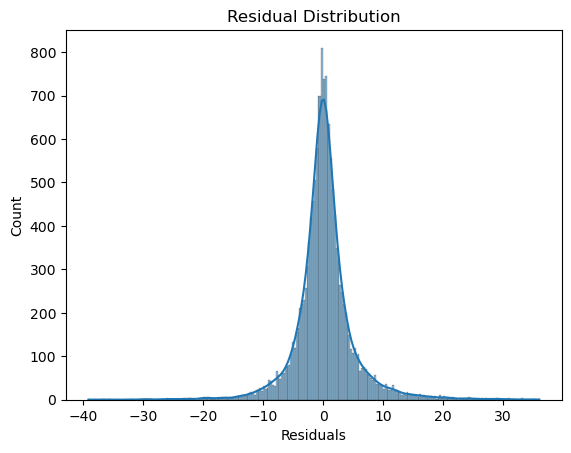

In [15]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def split_data(data, target_variable, columns_to_drop):
    X = data.drop(columns=[target_variable] + columns_to_drop)
    y = data[target_variable]
    return X, y

targets = ['yaw_error_mean']
hidden_layer_sizes_list = [(100, 100, 100, 100, 50)]
activation_functions = ['relu', 'sigmoid', 'tanh']

for target_variable in targets:
    X_train, y_train = split_data(big_train_df, target_variable, columns_to_drop)
    X_test, y_test = split_data(big_test_df, target_variable, columns_to_drop)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for hidden_layer_sizes in hidden_layer_sizes_list:
        for activation in activation_functions:
            model = keras.Sequential([
                keras.layers.Dense(hidden_layer_sizes[0], activation=activation, input_shape=(X_train_scaled.shape[1],)),
                keras.layers.Dense(hidden_layer_sizes[1], activation=activation),
                keras.layers.Dense(hidden_layer_sizes[2], activation=activation),
                keras.layers.Dense(hidden_layer_sizes[3], activation=activation),
                keras.layers.Dense(hidden_layer_sizes[4], activation=activation),
                keras.layers.Dense(1)  # Output layer
            ])
            
            model.compile(optimizer='adam', loss='mean_squared_error')
            history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)
            
            train_predictions = model.predict(X_train_scaled).flatten()
            test_predictions = model.predict(X_test_scaled).flatten()
            
            train_mae = mean_absolute_error(y_train, train_predictions)
            train_mse = mean_squared_error(y_train, train_predictions)
            train_rmse = np.sqrt(train_mse)
            train_r2 = r2_score(y_train, train_predictions)
            
            test_mae = mean_absolute_error(y_test, test_predictions)
            test_mse = mean_squared_error(y_test, test_predictions)
            test_rmse = np.sqrt(test_mse)
            test_r2 = r2_score(y_test, test_predictions)
            
            print("Target Variable:", target_variable)
            print("Hidden Layer Sizes:", hidden_layer_sizes)
            print("Activation Function:", activation)
            print("Training MAE:", train_mae)
            print("Training MSE:", train_mse)
            print("Training RMSE:", train_rmse)
            print("Training R2:", train_r2)
            print()
            print("Test MAE:", test_mae)
            print("Test MSE:", test_mse)
            print("Test RMSE:", test_rmse)
            print("Test R2:", test_r2)
            print()
            
            plt.scatter(y_test, test_predictions)
            plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
            plt.title("Actual vs Predicted")
            plt.xlabel("Actual")
            plt.ylabel("Predicted")
            plt.show()
            
            # Residual plot
            residuals = y_test - test_predictions
            sns.histplot(residuals, kde=True)
            plt.title("Residual Distribution")
            plt.xlabel("Residuals")
            plt.show()


## Dropout

485/485 [==============================] - 0s 812us/step
Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 100, 50)
Dropout Rate: 0.2
Training MAE: 3.543652284324064
Training MSE: 27.856197463509172
Training RMSE: 5.277897068294263
Training R2: 0.8010593978382834

Test MAE: 3.8778158543909296
Test MSE: 32.675322267526575
Test RMSE: 5.7162332236820586
Test R2: 0.7666346859936035



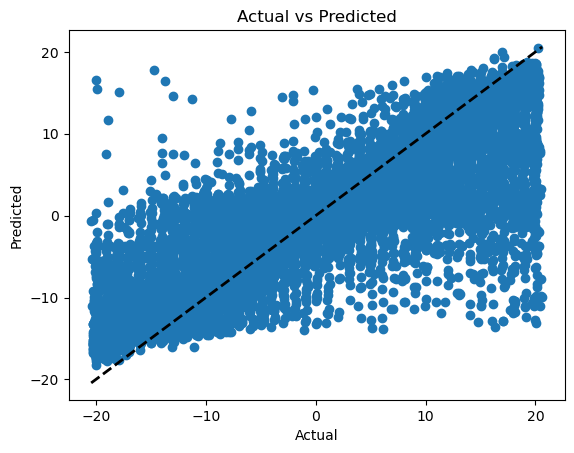

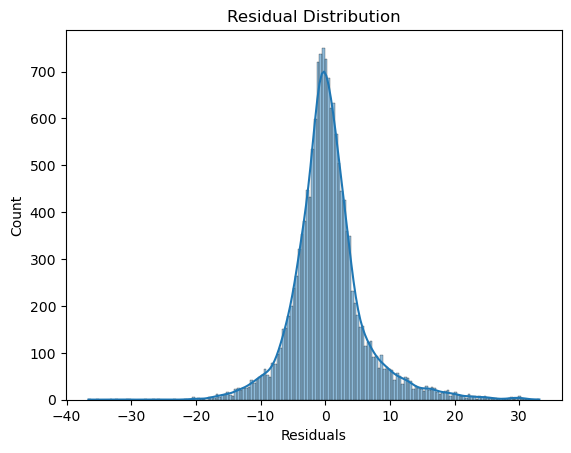

485/485 [==============================] - 0s 770us/step
Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 100, 50)
Dropout Rate: 0.5
Training MAE: 5.4088494442487836
Training MSE: 54.83887823078269
Training RMSE: 7.405327692329536
Training R2: 0.6083571897637382

Test MAE: 5.637868351178113
Test MSE: 57.98886762121277
Test RMSE: 7.615042194315982
Test R2: 0.5858467686866964



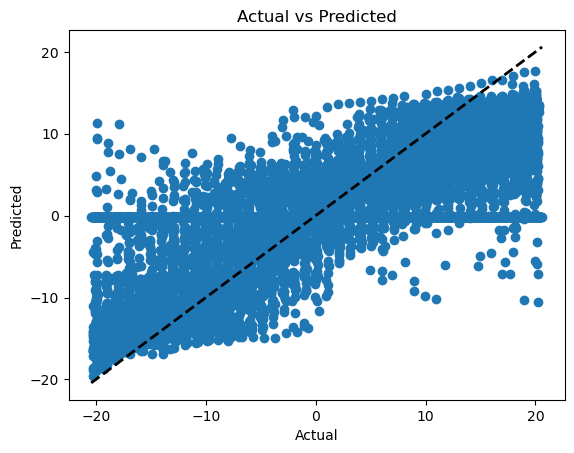

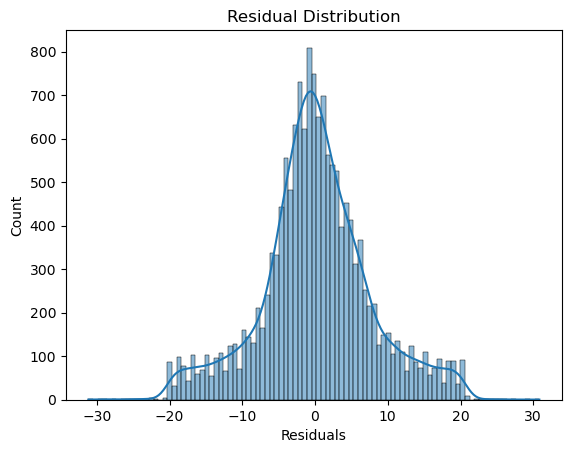

485/485 [==============================] - 0s 730us/step
Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 100, 50)
Dropout Rate: 0.8
Training MAE: 9.792834893694717
Training MSE: 128.94361064413212
Training RMSE: 11.355334017285978
Training R2: 0.07912343096888519

Test MAE: 9.753865705510337
Test MSE: 128.38127787083553
Test RMSE: 11.330546230029492
Test R2: 0.08310813348443735



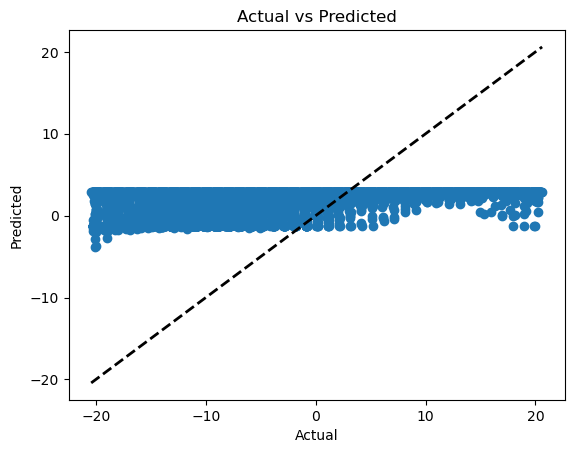

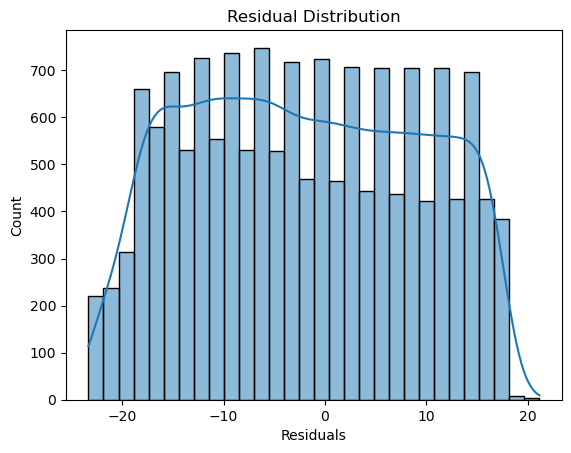

In [16]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def split_data(data, target_variable, columns_to_drop):
    X = data.drop(columns=[target_variable] + columns_to_drop)
    y = data[target_variable]
    return X, y

targets = ['yaw_error_mean']
hidden_layer_sizes_list = [(100, 100, 100, 100, 50)]
dropout_rates = [0.2, 0.5, 0.8]

for target_variable in targets:
    X_train, y_train = split_data(big_train_df, target_variable, columns_to_drop)
    X_test, y_test = split_data(big_test_df, target_variable, columns_to_drop)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for hidden_layer_sizes in hidden_layer_sizes_list:
        for dropout_rate in dropout_rates:
            model = keras.Sequential([
                keras.layers.Dense(hidden_layer_sizes[0], activation='relu', input_shape=(X_train_scaled.shape[1],)),
                keras.layers.Dropout(dropout_rate),
                keras.layers.Dense(hidden_layer_sizes[1], activation='relu'),
                keras.layers.Dropout(dropout_rate),
                keras.layers.Dense(hidden_layer_sizes[2], activation='relu'),
                keras.layers.Dropout(dropout_rate),
                keras.layers.Dense(hidden_layer_sizes[3], activation='relu'),
                keras.layers.Dropout(dropout_rate),
                keras.layers.Dense(hidden_layer_sizes[4], activation='relu'),
                keras.layers.Dropout(dropout_rate),
                keras.layers.Dense(1)  # Output layer
            ])
            
            model.compile(optimizer='adam', loss='mean_squared_error')
            history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)
            
            train_predictions = model.predict(X_train_scaled).flatten()
            test_predictions = model.predict(X_test_scaled).flatten()
            
            train_mae = mean_absolute_error(y_train, train_predictions)
            train_mse = mean_squared_error(y_train, train_predictions)
            train_rmse = np.sqrt(train_mse)
            train_r2 = r2_score(y_train, train_predictions)
            
            test_mae = mean_absolute_error(y_test, test_predictions)
            test_mse = mean_squared_error(y_test, test_predictions)
            test_rmse = np.sqrt(test_mse)
            test_r2 = r2_score(y_test, test_predictions)
            
            print("Target Variable:", target_variable)
            print("Hidden Layer Sizes:", hidden_layer_sizes)
            print("Dropout Rate:", dropout_rate)
            print("Training MAE:", train_mae)
            print("Training MSE:", train_mse)
            print("Training RMSE:", train_rmse)
            print("Training R2:", train_r2)
            print()
            print("Test MAE:", test_mae)
            print("Test MSE:", test_mse)
            print("Test RMSE:", test_rmse)
            print("Test R2:", test_r2)
            print()
            
            plt.scatter(y_test, test_predictions)
            plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
            plt.title("Actual vs Predicted")
            plt.xlabel("Actual")
            plt.ylabel("Predicted")
            plt.show()
            
            # Residual plot
            residuals = y_test - test_predictions
            sns.histplot(residuals, kde=True)
            plt.title("Residual Distribution")
            plt.xlabel("Residuals")
            plt.show()


## Batch Normalization: 

485/485 [==============================] - 0s 879us/step
Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 100, 50)
Training MAE: 2.2713002687155877
Training MSE: 12.179267747906488
Training RMSE: 3.489880764138868
Training R2: 0.9130193249516095

Test MAE: 2.7323731470839348
Test MSE: 18.03508315398314
Test RMSE: 4.246773263783121
Test R2: 0.8711944503897516



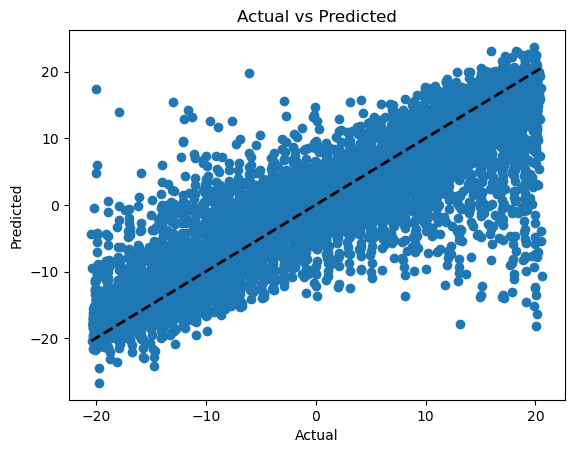

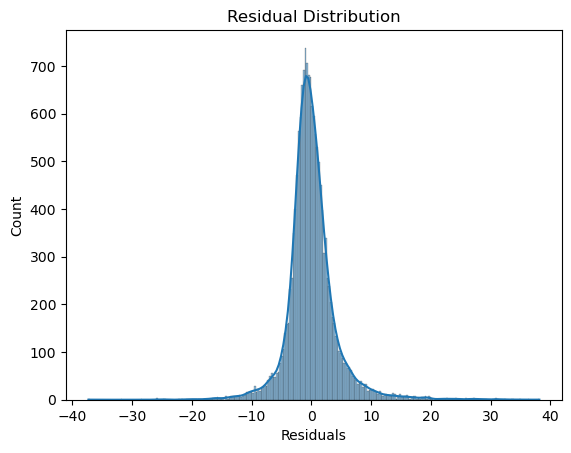

In [17]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def split_data(data, target_variable, columns_to_drop):
    X = data.drop(columns=[target_variable] + columns_to_drop)
    y = data[target_variable]
    return X, y

targets = ['yaw_error_mean']
hidden_layer_sizes_list = [(100, 100, 100, 100, 50)]

for target_variable in targets:
    X_train, y_train = split_data(big_train_df, target_variable, columns_to_drop)
    X_test, y_test = split_data(big_test_df, target_variable, columns_to_drop)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for hidden_layer_sizes in hidden_layer_sizes_list:
        model = keras.Sequential([
            keras.layers.Dense(hidden_layer_sizes[0], activation='relu', input_shape=(X_train_scaled.shape[1],)),
            keras.layers.BatchNormalization(),  # Batch normalization layer
            keras.layers.Dense(hidden_layer_sizes[1], activation='relu'),
            keras.layers.BatchNormalization(),  # Batch normalization layer
            keras.layers.Dense(hidden_layer_sizes[2], activation='relu'),
            keras.layers.BatchNormalization(),  # Batch normalization layer
            keras.layers.Dense(hidden_layer_sizes[3], activation='relu'),
            keras.layers.BatchNormalization(),  # Batch normalization layer
            keras.layers.Dense(hidden_layer_sizes[4], activation='relu'),
            keras.layers.BatchNormalization(),  # Batch normalization layer
            keras.layers.Dense(1)  # Output layer
        ])
        
        model.compile(optimizer='adam', loss='mean_squared_error')
        history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)
        
        train_predictions = model.predict(X_train_scaled).flatten()
        test_predictions = model.predict(X_test_scaled).flatten()
        
        train_mae = mean_absolute_error(y_train, train_predictions)
        train_mse = mean_squared_error(y_train, train_predictions)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, train_predictions)
        
        test_mae = mean_absolute_error(y_test, test_predictions)
        test_mse = mean_squared_error(y_test, test_predictions)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, test_predictions)
        
        print("Target Variable:", target_variable)
        print("Hidden Layer Sizes:", hidden_layer_sizes)
        print("Training MAE:", train_mae)
        print("Training MSE:", train_mse)
        print("Training RMSE:", train_rmse)
        print("Training R2:", train_r2)
        print()
        print("Test MAE:", test_mae)
        print("Test MSE:", test_mse)
        print("Test RMSE:", test_rmse)
        print("Test R2:", test_r2)
        print()
        
        plt.scatter(y_test, test_predictions)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        plt.title("Actual vs Predicted")
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.show()
        
        # Residual plot
        residuals = y_test - test_predictions
        sns.histplot(residuals, kde=True)
        plt.title("Residual Distribution")
        plt.xlabel("Residuals")
        plt.show()


## Weight Initialization: 

485/485 [==============================] - 1s 2ms/step
Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 100, 50)
Training MAE: 1.7644306319421525
Training MSE: 9.309404894817238
Training RMSE: 3.051131739997019
Training R2: 0.933515024153305

Test MAE: 2.5681252229487055
Test MSE: 19.431366492301663
Test RMSE: 4.40810236862776
Test R2: 0.8612222733130949



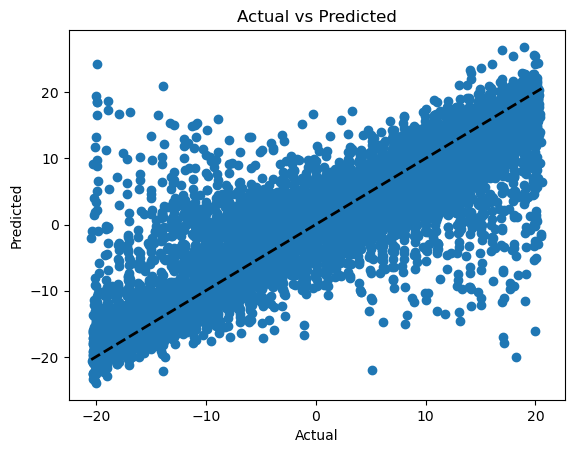

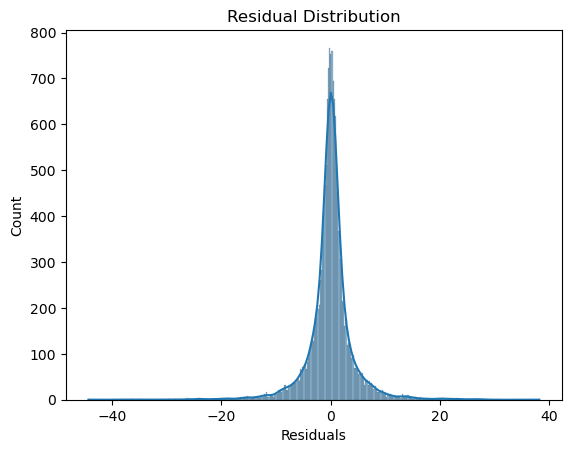

In [18]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def split_data(data, target_variable, columns_to_drop):
    X = data.drop(columns=[target_variable] + columns_to_drop)
    y = data[target_variable]
    return X, y

targets = ['yaw_error_mean']
hidden_layer_sizes_list = [(100, 100, 100, 100, 50)]

for target_variable in targets:
    X_train, y_train = split_data(big_train_df, target_variable, columns_to_drop)
    X_test, y_test = split_data(big_test_df, target_variable, columns_to_drop)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for hidden_layer_sizes in hidden_layer_sizes_list:
        model = keras.Sequential([
            keras.layers.Dense(hidden_layer_sizes[0], activation='relu', kernel_initializer='glorot_uniform', input_shape=(X_train_scaled.shape[1],)),
            keras.layers.Dense(hidden_layer_sizes[1], activation='relu', kernel_initializer='glorot_uniform'),
            keras.layers.Dense(hidden_layer_sizes[2], activation='relu', kernel_initializer='glorot_uniform'),
            keras.layers.Dense(hidden_layer_sizes[3], activation='relu', kernel_initializer='glorot_uniform'),
            keras.layers.Dense(hidden_layer_sizes[4], activation='relu', kernel_initializer='glorot_uniform'),
            keras.layers.Dense(1)  # Output layer
        ])
        
        model.compile(optimizer='adam', loss='mean_squared_error')
        history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)
        
        train_predictions = model.predict(X_train_scaled).flatten()
        test_predictions = model.predict(X_test_scaled).flatten()
        
        train_mae = mean_absolute_error(y_train, train_predictions)
        train_mse = mean_squared_error(y_train, train_predictions)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, train_predictions)
        
        test_mae = mean_absolute_error(y_test, test_predictions)
        test_mse = mean_squared_error(y_test, test_predictions)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, test_predictions)
        
        print("Target Variable:", target_variable)
        print("Hidden Layer Sizes:", hidden_layer_sizes)
        print("Training MAE:", train_mae)
        print("Training MSE:", train_mse)
        print("Training RMSE:", train_rmse)
        print("Training R2:", train_r2)
        print()
        print("Test MAE:", test_mae)
        print("Test MSE:", test_mse)
        print("Test RMSE:", test_rmse)
        print("Test R2:", test_r2)
        print()
        
        plt.scatter(y_test, test_predictions)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        plt.title("Actual vs Predicted")
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.show()
        
        # Residual plot
        residuals = y_test - test_predictions
        sns.histplot(residuals, kde=True)
        plt.title("Residual Distribution")
        plt.xlabel("Residuals")
        plt.show()


## Learning Rate

485/485 [==============================] - 0s 739us/step
Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 100, 50)
Learning Rate: 0.001
Training MAE: 1.9730378307463976
Training MSE: 11.270916829284793
Training RMSE: 3.3572186150569334
Training R2: 0.9195064946007143

Test MAE: 2.745949887253311
Test MSE: 21.133145460429944
Test RMSE: 4.59708010158948
Test R2: 0.8490682636291134



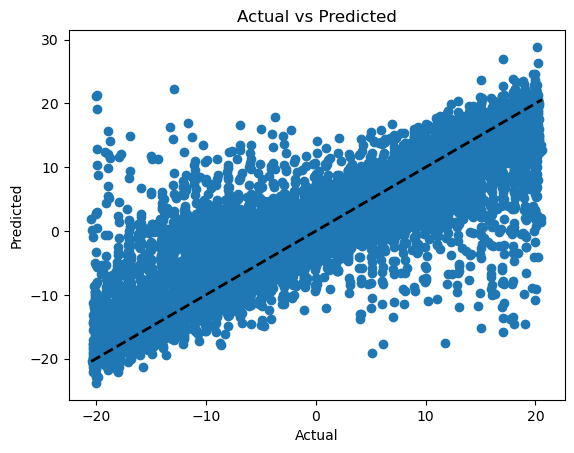

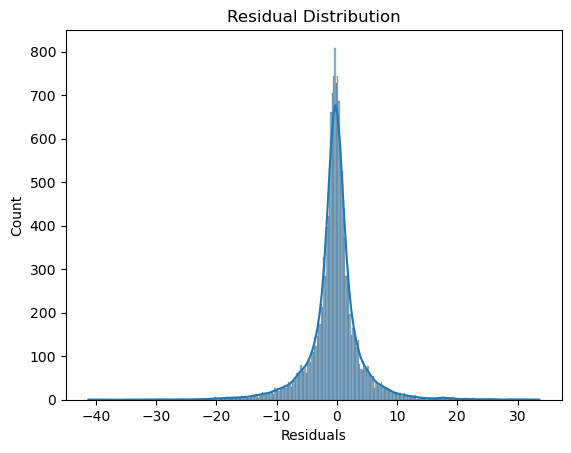

485/485 [==============================] - 0s 960us/step
Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 100, 50)
Learning Rate: 0.01
Training MAE: 3.4627442296929827
Training MSE: 28.300901228969487
Training RMSE: 5.3198591361961345
Training R2: 0.7978834570085938

Test MAE: 3.8496918018021216
Test MSE: 33.00562031928423
Test RMSE: 5.745051811714515
Test R2: 0.7642757158835909



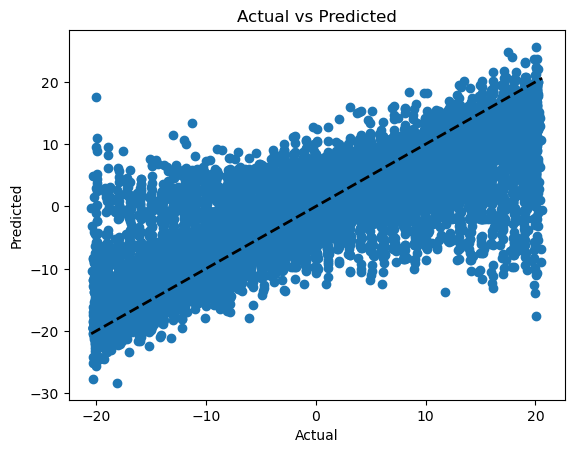

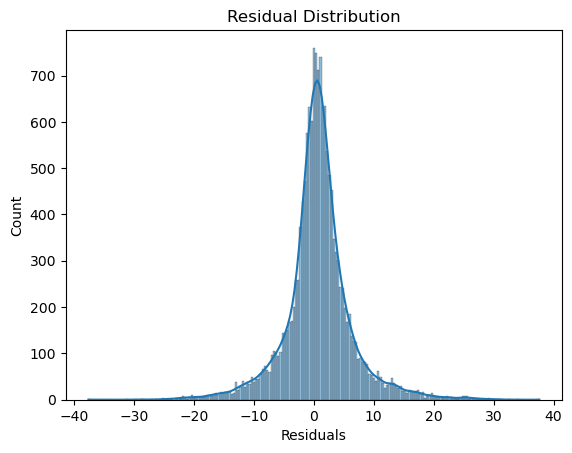

485/485 [==============================] - 0s 922us/step
Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 100, 50)
Learning Rate: 0.1
Training MAE: 10.247952503928115
Training MSE: 140.04329310121753
Training RMSE: 11.833988892221317
Training R2: -0.00014716993452479343

Test MAE: 10.247999551131594
Test MSE: 140.03740203857862
Test RMSE: 11.833739985253125
Test R2: -0.00013924979252077918



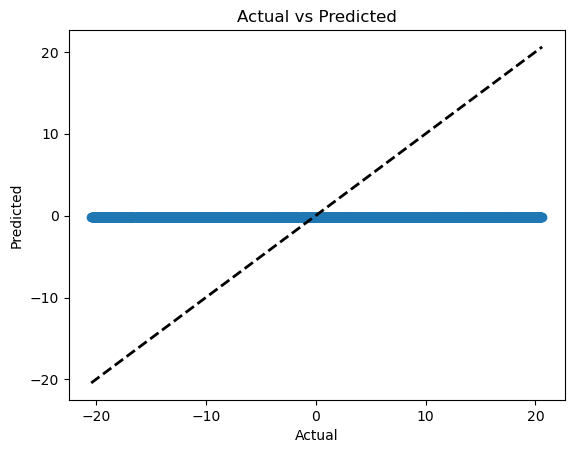

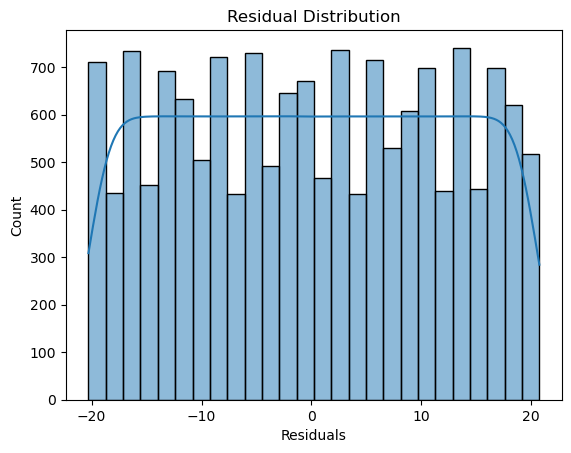

485/485 [==============================] - 0s 855us/step
Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 100, 50)
Learning Rate: 0.0001
Training MAE: 2.258006246824277
Training MSE: 13.73979421620178
Training RMSE: 3.706722840488857
Training R2: 0.9018745132558048

Test MAE: 2.973823873182221
Test MSE: 23.74675120553397
Test RMSE: 4.873063841725652
Test R2: 0.8304020383842202



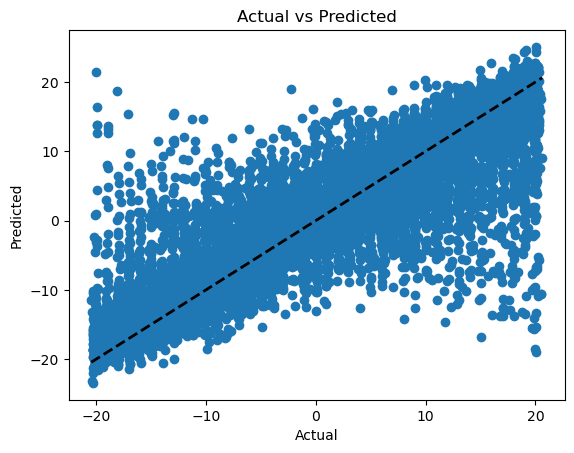

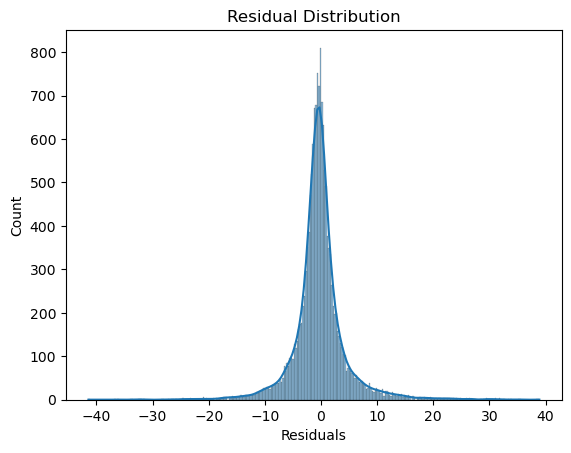

485/485 [==============================] - 0s 840us/step
Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 100, 50)
Learning Rate: 1e-05
Training MAE: 4.514343518524942
Training MSE: 41.0332264718769
Training RMSE: 6.405718263542107
Training R2: 0.7069530113129472

Test MAE: 4.89477604509568
Test MSE: 46.9668600462763
Test RMSE: 6.853237194660367
Test R2: 0.664565326919929



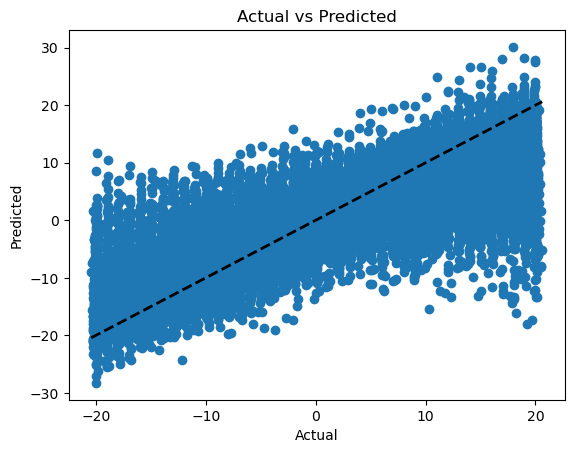

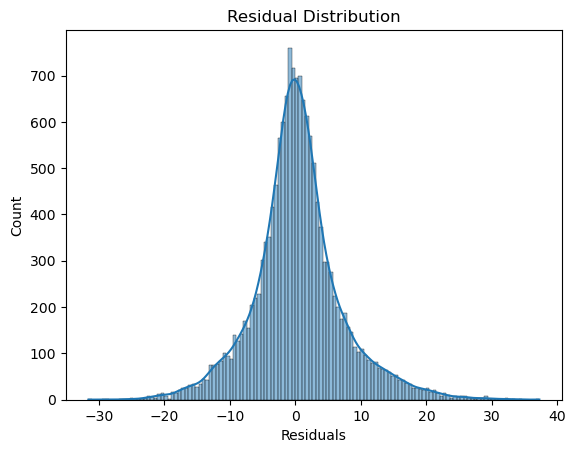

In [19]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def split_data(data, target_variable, columns_to_drop):
    X = data.drop(columns=[target_variable] + columns_to_drop)
    y = data[target_variable]
    return X, y

targets = ['yaw_error_mean']

hidden_layer_sizes_list = [(100, 100, 100, 100, 50)]
learning_rates = [0.001, 0.01, 0.1, 0.0001, 0.00001]  # Add more learning rates

for target_variable in targets:
    X_train, y_train = split_data(big_train_df, target_variable, columns_to_drop)
    X_test, y_test = split_data(big_test_df, target_variable, columns_to_drop)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for hidden_layer_sizes in hidden_layer_sizes_list:
        for learning_rate in learning_rates:
            model = keras.Sequential([
                keras.layers.Dense(hidden_layer_sizes[0], activation='relu', input_shape=(X_train_scaled.shape[1],)),
                keras.layers.Dense(hidden_layer_sizes[1], activation='relu'),
                keras.layers.Dense(hidden_layer_sizes[2], activation='relu'),
                keras.layers.Dense(hidden_layer_sizes[3], activation='relu'),
                keras.layers.Dense(hidden_layer_sizes[4], activation='relu'),
                keras.layers.Dense(1)  # Output layer
            ])
            
            optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
            
            model.compile(optimizer=optimizer, loss='mean_squared_error')
            history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)
            
            train_predictions = model.predict(X_train_scaled).flatten()
            test_predictions = model.predict(X_test_scaled).flatten()
            
            train_mae = mean_absolute_error(y_train, train_predictions)
            train_mse = mean_squared_error(y_train, train_predictions)
            train_rmse = np.sqrt(train_mse)
            train_r2 = r2_score(y_train, train_predictions)
            
            test_mae = mean_absolute_error(y_test, test_predictions)
            test_mse = mean_squared_error(y_test, test_predictions)
            test_rmse = np.sqrt(test_mse)
            test_r2 = r2_score(y_test, test_predictions)
            
            print("Target Variable:", target_variable)
            print("Hidden Layer Sizes:", hidden_layer_sizes)
            print("Learning Rate:", learning_rate)
            print("Training MAE:", train_mae)
            print("Training MSE:", train_mse)
            print("Training RMSE:", train_rmse)
            print("Training R2:", train_r2)
            print()
            print("Test MAE:", test_mae)
            print("Test MSE:", test_mse)
            print("Test RMSE:", test_rmse)
            print("Test R2:", test_r2)
            print()
            
            plt.scatter(y_test, test_predictions)
            plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
            plt.title("Actual vs Predicted")
            plt.xlabel("Actual")
            plt.ylabel("Predicted")
            plt.show()
            
            # Residual plot
            residuals = y_test - test_predictions
            sns.histplot(residuals, kde=True)
            plt.title("Residual Distribution")
            plt.xlabel("Residuals")
            plt.show()


## Number of Training Epochs: 

485/485 [==============================] - 0s 844us/step
Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 100, 50)
Number of Epochs: 500
Training MAE: 1.0054971185476722
Training MSE: 2.367755155674825
Training RMSE: 1.538751167562457
Training R2: 0.9830902032821058

Test MAE: 2.2302759748686456
Test MSE: 15.705871574726984
Test RMSE: 3.963063407861018
Test R2: 0.88782954849621



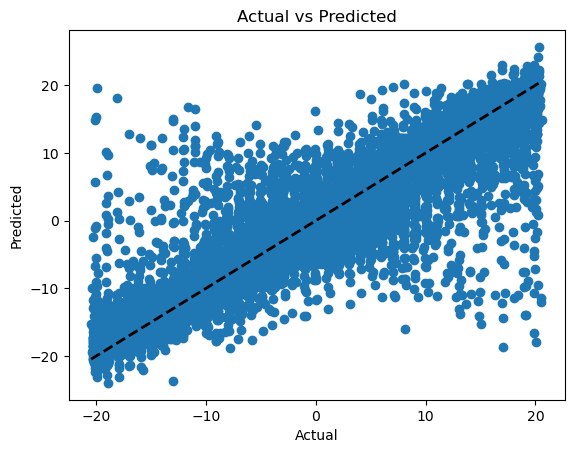

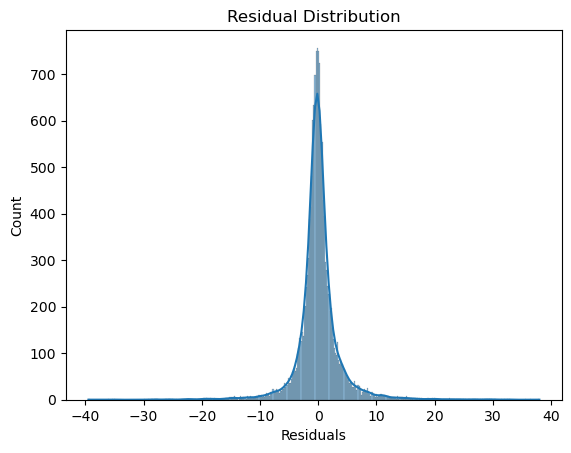

485/485 [==============================] - 0s 811us/step
Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 100, 50)
Number of Epochs: 1000
Training MAE: 1.1788789664185977
Training MSE: 3.9907270648165394
Training RMSE: 1.9976804210925578
Training R2: 0.9714994249887239

Test MAE: 2.36061703242172
Test MSE: 18.39348980489897
Test RMSE: 4.288763202241291
Test R2: 0.8686347302453515



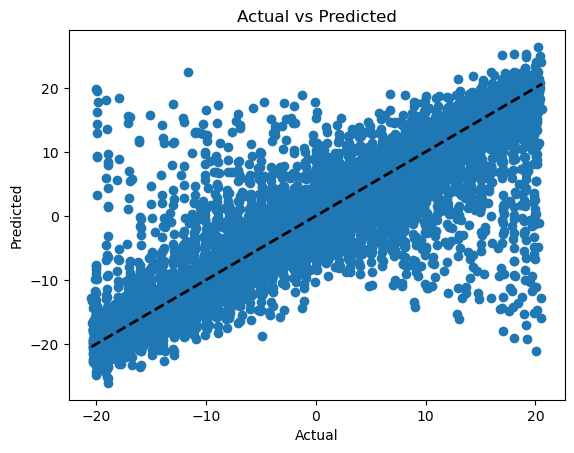

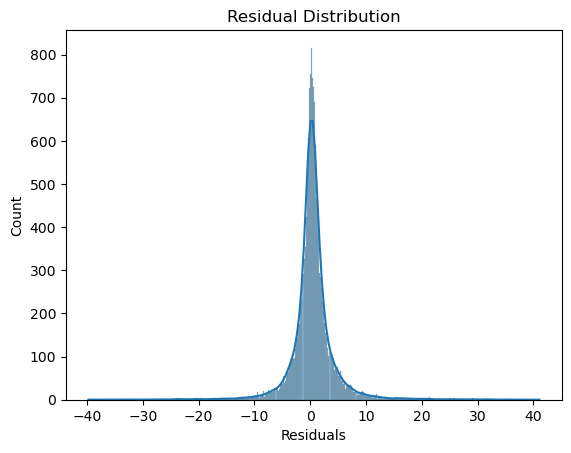

485/485 [==============================] - 0s 747us/step
Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 100, 50)
Number of Epochs: 1500
Training MAE: 1.4485068253708167
Training MSE: 7.567249604844199
Training RMSE: 2.7508634289699296
Training R2: 0.9459569743836074

Test MAE: 2.601056898599984
Test MSE: 21.206513380518018
Test RMSE: 4.605053026895349
Test R2: 0.8485442740699846



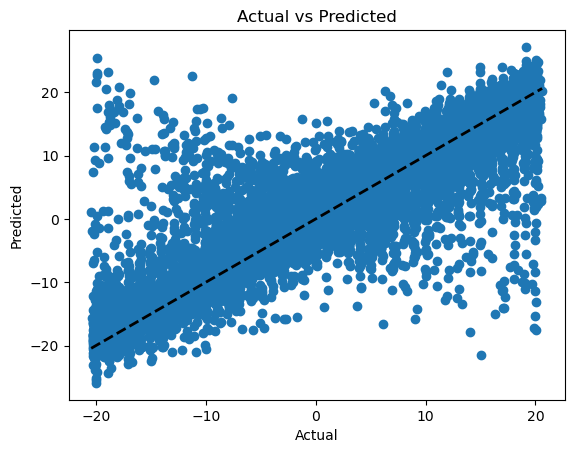

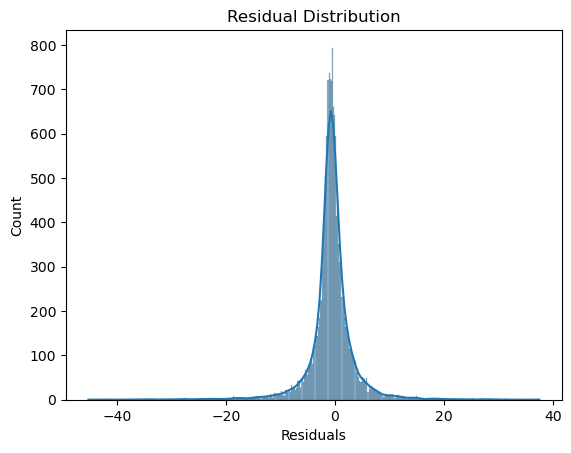

In [20]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def split_data(data, target_variable, columns_to_drop):
    X = data.drop(columns=[target_variable] + columns_to_drop)
    y = data[target_variable]
    return X, y

targets = ['yaw_error_mean']

hidden_layer_sizes_list = [(100, 100, 100, 100, 50)]
num_epochs_list = [500, 1000, 1500]  # Modify the list of training epochs

for target_variable in targets:
    X_train, y_train = split_data(big_train_df, target_variable, columns_to_drop)
    X_test, y_test = split_data(big_test_df, target_variable, columns_to_drop)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for hidden_layer_sizes in hidden_layer_sizes_list:
        for num_epochs in num_epochs_list:
            model = keras.Sequential([
                keras.layers.Dense(hidden_layer_sizes[0], activation='relu', input_shape=(X_train_scaled.shape[1],)),
                keras.layers.Dense(hidden_layer_sizes[1], activation='relu'),
                keras.layers.Dense(hidden_layer_sizes[2], activation='relu'),
                keras.layers.Dense(hidden_layer_sizes[3], activation='relu'),
                keras.layers.Dense(hidden_layer_sizes[4], activation='relu'),
                keras.layers.Dense(1)  # Output layer
            ])
            
            model.compile(optimizer='adam', loss='mean_squared_error')
            history = model.fit(X_train_scaled, y_train, epochs=num_epochs, batch_size=32, verbose=0)
            
            train_predictions = model.predict(X_train_scaled).flatten()
            test_predictions = model.predict(X_test_scaled).flatten()
            
            train_mae = mean_absolute_error(y_train, train_predictions)
            train_mse = mean_squared_error(y_train, train_predictions)
            train_rmse = np.sqrt(train_mse)
            train_r2 = r2_score(y_train, train_predictions)
            
            test_mae = mean_absolute_error(y_test, test_predictions)
            test_mse = mean_squared_error(y_test, test_predictions)
            test_rmse = np.sqrt(test_mse)
            test_r2 = r2_score(y_test, test_predictions)
            
            print("Target Variable:", target_variable)
            print("Hidden Layer Sizes:", hidden_layer_sizes)
            print("Number of Epochs:", num_epochs)
            print("Training MAE:", train_mae)
            print("Training MSE:", train_mse)
            print("Training RMSE:", train_rmse)
            print("Training R2:", train_r2)
            print()
            print("Test MAE:", test_mae)
            print("Test MSE:", test_mse)
            print("Test RMSE:", test_rmse)
            print("Test R2:", test_r2)
            print()
            
            
            plt.scatter(y_test, test_predictions)
            plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
            plt.title("Actual vs Predicted")
            plt.xlabel("Actual")
            plt.ylabel("Predicted")
            plt.show()
            
            # Residual plot
            residuals = y_test - test_predictions
            sns.histplot(residuals, kde=True)
            plt.title("Residual Distribution")
            plt.xlabel("Residuals")
            plt.show()


## Batch Size: 

485/485 [==============================] - 0s 777us/step
Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 100, 50)
Batch Size: 16
Training MAE: 1.8524358512769916
Training MSE: 11.019470732721166
Training RMSE: 3.319558815975576
Training R2: 0.9213022471590853

Test MAE: 2.657815224764086
Test MSE: 21.033293756848927
Test RMSE: 4.586206902969918
Test R2: 0.8497813988805264



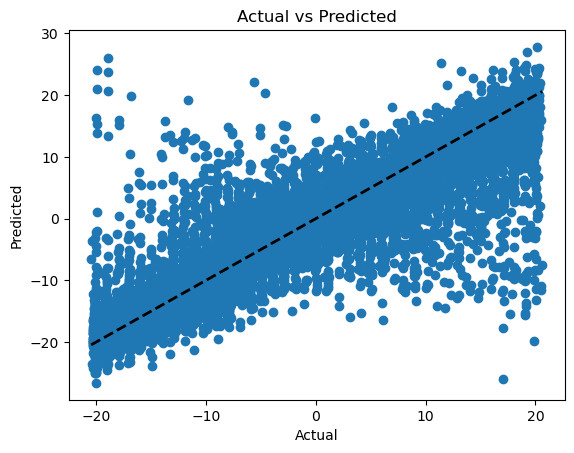

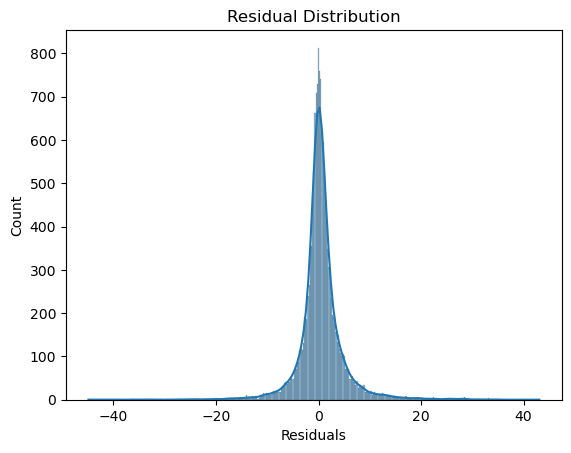

485/485 [==============================] - 0s 745us/step
Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 100, 50)
Batch Size: 32
Training MAE: 1.7503024241529557
Training MSE: 8.732192349932014
Training RMSE: 2.9550283162656856
Training R2: 0.9376373029174898

Test MAE: 2.5444940563916942
Test MSE: 18.996202442249754
Test RMSE: 4.358463312022915
Test R2: 0.8643301904853635



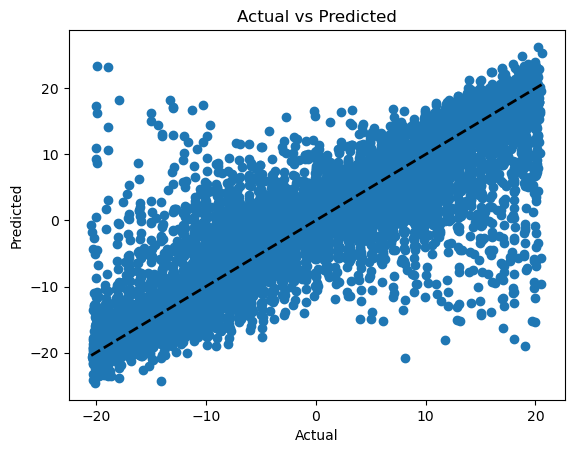

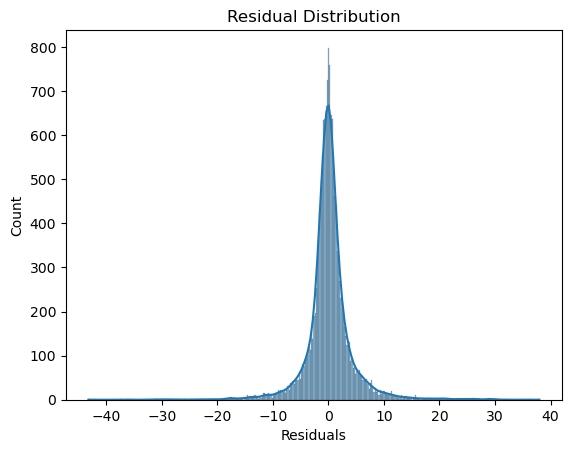

485/485 [==============================] - 0s 745us/step
Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 100, 50)
Batch Size: 64
Training MAE: 1.9244989512521564
Training MSE: 13.488075929410714
Training RMSE: 3.672611595229029
Training R2: 0.9036722097150911

Test MAE: 2.7422058859248395
Test MSE: 24.46994588723964
Test RMSE: 4.946710612845635
Test R2: 0.8252370226392424



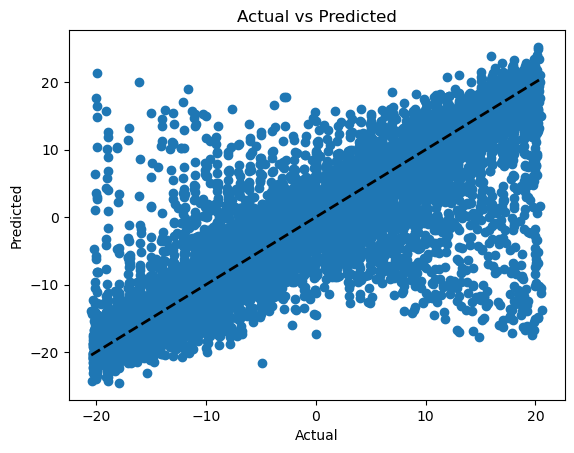

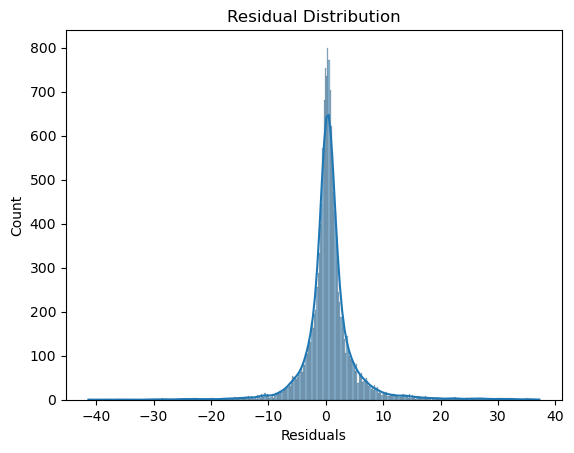

In [21]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def split_data(data, target_variable, columns_to_drop):
    X = data.drop(columns=[target_variable] + columns_to_drop)
    y = data[target_variable]
    return X, y

targets = ['yaw_error_mean']

hidden_layer_sizes_list = [(100, 100, 100, 100, 50)]
batch_sizes = [16, 32, 64]  # Modify the list of batch sizes

for target_variable in targets:
    X_train, y_train = split_data(big_train_df, target_variable, columns_to_drop)
    X_test, y_test = split_data(big_test_df, target_variable, columns_to_drop)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for hidden_layer_sizes in hidden_layer_sizes_list:
        for batch_size in batch_sizes:
            model = keras.Sequential([
                keras.layers.Dense(hidden_layer_sizes[0], activation='relu', input_shape=(X_train_scaled.shape[1],)),
                keras.layers.Dense(hidden_layer_sizes[1], activation='relu'),
                keras.layers.Dense(hidden_layer_sizes[2], activation='relu'),
                keras.layers.Dense(hidden_layer_sizes[3], activation='relu'),
                keras.layers.Dense(hidden_layer_sizes[4], activation='relu'),
                keras.layers.Dense(1)  # Output layer
            ])
            
            model.compile(optimizer='adam', loss='mean_squared_error')
            history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=batch_size, verbose=0)
            
            train_predictions = model.predict(X_train_scaled).flatten()
            test_predictions = model.predict(X_test_scaled).flatten()
            
            train_mae = mean_absolute_error(y_train, train_predictions)
            train_mse = mean_squared_error(y_train, train_predictions)
            train_rmse = np.sqrt(train_mse)
            train_r2 = r2_score(y_train, train_predictions)
            
            test_mae = mean_absolute_error(y_test, test_predictions)
            test_mse = mean_squared_error(y_test, test_predictions)
            test_rmse = np.sqrt(test_mse)
            test_r2 = r2_score(y_test, test_predictions)
            
            print("Target Variable:", target_variable)
            print("Hidden Layer Sizes:", hidden_layer_sizes)
            print("Batch Size:", batch_size)
            print("Training MAE:", train_mae)
            print("Training MSE:", train_mse)
            print("Training RMSE:", train_rmse)
            print("Training R2:", train_r2)
            print()
            print("Test MAE:", test_mae)
            print("Test MSE:", test_mse)
            print("Test RMSE:", test_rmse)
            print("Test R2:", test_r2)
            print()
            
            
            plt.scatter(y_test, test_predictions)
            plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
            plt.title("Actual vs Predicted")
            plt.xlabel("Actual")
            plt.ylabel("Predicted")
            plt.show()
            
            # Residual plot
            residuals = y_test - test_predictions
            sns.histplot(residuals, kde=True)
            plt.title("Residual Distribution")
            plt.xlabel("Residuals")
            plt.show()


## Regularization: 

485/485 [==============================] - 0s 811us/step
Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 100, 50)
Training MAE: 2.508790921825318
Training MSE: 16.8045642637268
Training RMSE: 4.099337051734927
Training R2: 0.8799868453664412

Test MAE: 2.9527447112486387
Test MSE: 22.403334645652347
Test RMSE: 4.733216099614759
Test R2: 0.8399966439024568



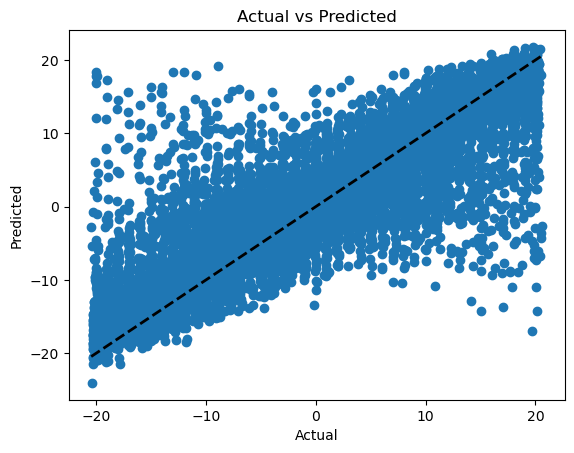

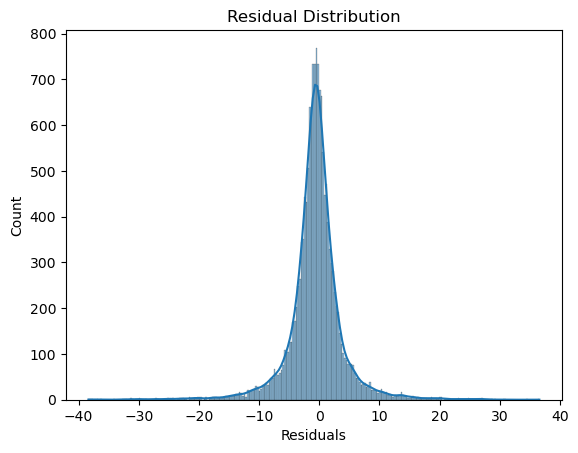

In [22]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def split_data(data, target_variable, columns_to_drop):
    X = data.drop(columns=[target_variable] + columns_to_drop)
    y = data[target_variable]
    return X, y

targets = ['yaw_error_mean']

hidden_layer_sizes_list = [(100, 100, 100, 100, 50)]

for target_variable in targets:
    X_train, y_train = split_data(big_train_df, target_variable, columns_to_drop)
    X_test, y_test = split_data(big_test_df, target_variable, columns_to_drop)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for hidden_layer_sizes in hidden_layer_sizes_list:
        model = keras.Sequential([
            keras.layers.Dense(hidden_layer_sizes[0], activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=keras.regularizers.l2(0.01)),
            keras.layers.Dense(hidden_layer_sizes[1], activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
            keras.layers.Dense(hidden_layer_sizes[2], activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
            keras.layers.Dense(hidden_layer_sizes[3], activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
            keras.layers.Dense(hidden_layer_sizes[4], activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
            keras.layers.Dense(1)  # Output layer
        ])
        
        model.compile(optimizer='adam', loss='mean_squared_error')
        history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)
        
        train_predictions = model.predict(X_train_scaled).flatten()
        test_predictions = model.predict(X_test_scaled).flatten()
        
        train_mae = mean_absolute_error(y_train, train_predictions)
        train_mse = mean_squared_error(y_train, train_predictions)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, train_predictions)
        
        test_mae = mean_absolute_error(y_test, test_predictions)
        test_mse = mean_squared_error(y_test, test_predictions)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, test_predictions)
        
        print("Target Variable:", target_variable)
        print("Hidden Layer Sizes:", hidden_layer_sizes)
        print("Training MAE:", train_mae)
        print("Training MSE:", train_mse)
        print("Training RMSE:", train_rmse)
        print("Training R2:", train_r2)
        print()
        print("Test MAE:", test_mae)
        print("Test MSE:", test_mse)
        print("Test RMSE:", test_rmse)
        print("Test R2:", test_r2)
        print()
        
        
        plt.scatter(y_test, test_predictions)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        plt.title("Actual vs Predicted")
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.show()
        
        # Residual plot
        residuals = y_test - test_predictions
        sns.histplot(residuals, kde=True)
        plt.title("Residual Distribution")
        plt.xlabel("Residuals")
        plt.show()


In [9]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to split data
def split_data(data, target_variable, columns_to_drop):
    X = data.drop(columns=[target_variable] + columns_to_drop)
    y = data[target_variable]
    return X, y

# List of target variables
targets = ['yaw_error_mean']

# Hyperparameters to tune
hidden_layer_sizes_list = [(100, 100, 100, 100, 50)]
batch_sizes = [16, 32, 64, 128]  # Different batch sizes to try

# Loop through each target variable
for target_variable in targets:
    X_train, y_train = split_data(big_train_df, target_variable, columns_to_drop)
    X_test, y_test = split_data(big_test_df, target_variable, columns_to_drop)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for hidden_layer_sizes in hidden_layer_sizes_list:
        for batch_size in batch_sizes:
            model = keras.Sequential([
                keras.layers.Dense(hidden_layer_sizes[0], activation='relu', input_shape=(X_train_scaled.shape[1],)),
                keras.layers.Dense(hidden_layer_sizes[1], activation='relu'),
                keras.layers.Dense(hidden_layer_sizes[2], activation='relu'),
                keras.layers.Dense(hidden_layer_sizes[3], activation='relu'),
                keras.layers.Dense(hidden_layer_sizes[4], activation='relu'),
                keras.layers.Dense(1)  # Output layer
            ])
            
            model.compile(optimizer='adam', loss='mean_squared_error')
            history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=batch_size, verbose=0)
            
            train_predictions = model.predict(X_train_scaled).flatten()
            test_predictions = model.predict(X_test_scaled).flatten()
            
            train_mae = mean_absolute_error(y_train, train_predictions)
            train_mse = mean_squared_error(y_train, train_predictions)
            train_rmse = np.sqrt(train_mse)
            train_r2 = r2_score(y_train, train_predictions)
            
            test_mae = mean_absolute_error(y_test, test_predictions)
            test_mse = mean_squared_error(y_test, test_predictions)
            test_rmse = np.sqrt(test_mse)
            test_r2 = r2_score(y_test, test_predictions)
            
            print("Target Variable:", target_variable)
            print("Hidden Layer Sizes:", hidden_layer_sizes)
            print("Batch Size:", batch_size)
            print("Training MAE:", train_mae)
            print("Training MSE:", train_mse)
            print("Training RMSE:", train_rmse)
            print("Training R2:", train_r2)
            print()
            print("Test MAE:", test_mae)
            print("Test MSE:", test_mse)
            print("Test RMSE:", test_rmse)
            print("Test R2:", test_r2)
            print()


485/485 [==============================] - 0s 744us/step
Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 100, 50)
Batch Size: 16
Training MAE: 1.7736597847177529
Training MSE: 8.892526855900583
Training RMSE: 2.9820340132031666
Training R2: 0.9364922419949977

Test MAE: 2.5755852821161604
Test MSE: 19.404815142777252
Test RMSE: 4.405089686121867
Test R2: 0.8614119015581763

485/485 [==============================] - 0s 724us/step
Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 100, 50)
Batch Size: 32
Training MAE: 1.6477336882212734
Training MSE: 8.283583738580791
Training RMSE: 2.8781215642465123
Training R2: 0.9408411309846212

Test MAE: 2.4470420021574455
Test MSE: 18.195880599340743
Test RMSE: 4.265662973013778
Test R2: 0.8700460440780993

485/485 [==============================] - 0s 763us/step
Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 100, 50)
Batch Size: 64
Training MAE: 1.954721144060807
Training MSE: 10.84621711

In [10]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to split data
def split_data(data, target_variable, columns_to_drop):
    X = data.drop(columns=[target_variable] + columns_to_drop)
    y = data[target_variable]
    return X, y

# List of target variables
targets = ['yaw_error_mean']

# Hyperparameters to tune
hidden_layer_sizes_list = [(100, 100, 100, 100, 50)]
batch_size = 32
activation_functions = ['relu', 'sigmoid', 'tanh']  # Different activation functions to try

# Loop through each target variable
for target_variable in targets:
    X_train, y_train = split_data(big_train_df, target_variable, columns_to_drop)
    X_test, y_test = split_data(big_test_df, target_variable, columns_to_drop)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for hidden_layer_sizes in hidden_layer_sizes_list:
        for activation in activation_functions:
            model = keras.Sequential([
                keras.layers.Dense(hidden_layer_sizes[0], activation=activation, input_shape=(X_train_scaled.shape[1],)),
                keras.layers.Dense(hidden_layer_sizes[1], activation=activation),
                keras.layers.Dense(hidden_layer_sizes[2], activation=activation),
                keras.layers.Dense(hidden_layer_sizes[3], activation=activation),
                keras.layers.Dense(hidden_layer_sizes[4], activation=activation),
                keras.layers.Dense(1)  # Output layer
            ])
            
            model.compile(optimizer='adam', loss='mean_squared_error')
            history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=batch_size, verbose=0)
            
            train_predictions = model.predict(X_train_scaled).flatten()
            test_predictions = model.predict(X_test_scaled).flatten()
            
            train_mae = mean_absolute_error(y_train, train_predictions)
            train_mse = mean_squared_error(y_train, train_predictions)
            train_rmse = np.sqrt(train_mse)
            train_r2 = r2_score(y_train, train_predictions)
            
            test_mae = mean_absolute_error(y_test, test_predictions)
            test_mse = mean_squared_error(y_test, test_predictions)
            test_rmse = np.sqrt(test_mse)
            test_r2 = r2_score(y_test, test_predictions)
            
            print("Target Variable:", target_variable)
            print("Hidden Layer Sizes:", hidden_layer_sizes)
            print("Activation Function:", activation)
            print("Training MAE:", train_mae)
            print("Training MSE:", train_mse)
            print("Training RMSE:", train_rmse)
            print("Training R2:", train_r2)
            print()
            print("Test MAE:", test_mae)
            print("Test MSE:", test_mse)
            print("Test RMSE:", test_rmse)
            print("Test R2:", test_r2)
            print()


485/485 [==============================] - 0s 752us/step
Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 100, 50)
Activation Function: relu
Training MAE: 1.7236130571514117
Training MSE: 9.01455051727507
Training RMSE: 3.002424106830191
Training R2: 0.9356207856268549

Test MAE: 2.5853231254857905
Test MSE: 19.94678821134274
Test RMSE: 4.4661827337607605
Test R2: 0.8575411603825187

485/485 [==============================] - 0s 785us/step
Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 100, 50)
Activation Function: sigmoid
Training MAE: 2.657952572653455
Training MSE: 20.00042026358404
Training RMSE: 4.472182941649865
Training R2: 0.8571630009466638

Test MAE: 3.179578511381187
Test MSE: 27.325662682508927
Test RMSE: 5.227395401393406
Test R2: 0.8048416538901584

485/485 [==============================] - 1s 1ms/step
Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 100, 50)
Activation Function: tanh
Training MAE: 2.072681144568

In [11]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to split data
def split_data(data, target_variable, columns_to_drop):
    X = data.drop(columns=[target_variable] + columns_to_drop)
    y = data[target_variable]
    return X, y

# List of target variables
targets = ['yaw_error_mean']

# Hyperparameters to tune
hidden_layer_sizes_list = [(100, 100, 100, 100, 50)]  # Number of neurons per hidden layer
batch_size = 32
activation_functions = ['relu']  # Activation function to use
learning_rates = [0.001, 0.01, 0.1]  # Different learning rates to try

# Loop through each target variable
for target_variable in targets:
    X_train, y_train = split_data(big_train_df, target_variable, columns_to_drop)
    X_test, y_test = split_data(big_test_df, target_variable, columns_to_drop)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for hidden_layer_sizes in hidden_layer_sizes_list:
        for activation in activation_functions:
            for learning_rate in learning_rates:
                optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
                
                model = keras.Sequential([
                    keras.layers.Dense(hidden_layer_sizes[0], activation=activation, input_shape=(X_train_scaled.shape[1],)),
                    keras.layers.Dense(hidden_layer_sizes[1], activation=activation) if len(hidden_layer_sizes) > 1 else None,
                    keras.layers.Dense(hidden_layer_sizes[2], activation=activation) if len(hidden_layer_sizes) > 2 else None,
                    keras.layers.Dense(hidden_layer_sizes[3], activation=activation) if len(hidden_layer_sizes) > 3 else None,
                    keras.layers.Dense(hidden_layer_sizes[4], activation=activation) if len(hidden_layer_sizes) > 4 else None,
                    keras.layers.Dense(1)  # Output layer
                ])
                
                model.compile(optimizer=optimizer, loss='mean_squared_error')
                history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=batch_size, verbose=0)
                
                train_predictions = model.predict(X_train_scaled).flatten()
                test_predictions = model.predict(X_test_scaled).flatten()
                
                train_mae = mean_absolute_error(y_train, train_predictions)
                train_mse = mean_squared_error(y_train, train_predictions)
                train_rmse = np.sqrt(train_mse)
                train_r2 = r2_score(y_train, train_predictions)
                
                test_mae = mean_absolute_error(y_test, test_predictions)
                test_mse = mean_squared_error(y_test, test_predictions)
                test_rmse = np.sqrt(test_mse)
                test_r2 = r2_score(y_test, test_predictions)
                
                print("Target Variable:", target_variable)
                print("Hidden Layer Sizes:", hidden_layer_sizes)
                print("Activation Function:", activation)
                print("Learning Rate:", learning_rate)
                print("Training MAE:", train_mae)
                print("Training MSE:", train_mse)
                print("Training RMSE:", train_rmse)
                print("Training R2:", train_r2)
                print()
                print("Test MAE:", test_mae)
                print("Test MSE:", test_mse)
                print("Test RMSE:", test_rmse)
                print("Test R2:", test_r2)
                print()


485/485 [==============================] - 0s 734us/step
Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 100, 50)
Activation Function: relu
Learning Rate: 0.001
Training MAE: 1.7555433712643678
Training MSE: 9.466887717124974
Training RMSE: 3.0768307911103876
Training R2: 0.9323903290996793

Test MAE: 2.6066493885803275
Test MSE: 20.92268460472266
Test RMSE: 4.5741321149178304
Test R2: 0.8505713632244613

485/485 [==============================] - 0s 754us/step
Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 100, 50)
Activation Function: relu
Learning Rate: 0.01
Training MAE: 3.9815538486913713
Training MSE: 35.40193035087214
Training RMSE: 5.949952130132825
Training R2: 0.7471700381606058

Test MAE: 4.321584384701195
Test MSE: 42.52709355194194
Test RMSE: 6.5212800547087335
Test R2: 0.6962738895343243

485/485 [==============================] - 0s 757us/step
Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 100, 50)
Activation 

In [13]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to split data
def split_data(data, target_variable, columns_to_drop):
    X = data.drop(columns=[target_variable] + columns_to_drop)
    y = data[target_variable]
    return X, y

# List of target variables
targets = ['yaw_error_mean']

# Hyperparameters to tune
hidden_layer_sizes_list = [(100, 100, 100, 100, 50)]  # Number of neurons per hidden layer
batch_size = 32
activation_functions = ['relu']  # Activation function to use
learning_rate = 0.001  # Learning rate
epochs = 100  # Number of training epochs
regularization_strengths = [0.001, 0.01, 0.1]  # Regularization strengths to try

# Loop through each target variable
for target_variable in targets:
    X_train, y_train = split_data(big_train_df, target_variable, columns_to_drop)
    X_test, y_test = split_data(big_test_df, target_variable, columns_to_drop)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for hidden_layer_sizes in hidden_layer_sizes_list:
        for activation in activation_functions:
            for regularization_strength in regularization_strengths:
                optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
                regularizer = keras.regularizers.l2(regularization_strength)
                
                model = keras.Sequential([
                    keras.layers.Dense(hidden_layer_sizes[0], activation=activation, kernel_regularizer=regularizer, input_shape=(X_train_scaled.shape[1],)),
                    keras.layers.Dense(hidden_layer_sizes[1], activation=activation, kernel_regularizer=regularizer) if len(hidden_layer_sizes) > 1 else None,
                    keras.layers.Dense(hidden_layer_sizes[2], activation=activation, kernel_regularizer=regularizer) if len(hidden_layer_sizes) > 2 else None,
                    keras.layers.Dense(hidden_layer_sizes[3], activation=activation, kernel_regularizer=regularizer) if len(hidden_layer_sizes) > 3 else None,
                    keras.layers.Dense(hidden_layer_sizes[4], activation=activation, kernel_regularizer=regularizer) if len(hidden_layer_sizes) > 4 else None,
                    keras.layers.Dense(1)  # Output layer
                ])
                
                model.compile(optimizer=optimizer, loss='mean_squared_error')
                history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
                
                train_predictions = model.predict(X_train_scaled).flatten()
                test_predictions = model.predict(X_test_scaled).flatten()
                
                train_mae = mean_absolute_error(y_train, train_predictions)
                train_mse = mean_squared_error(y_train, train_predictions)
                train_rmse = np.sqrt(train_mse)
                train_r2 = r2_score(y_train, train_predictions)
                
                test_mae = mean_absolute_error(y_test, test_predictions)
                test_mse = mean_squared_error(y_test, test_predictions)
                test_rmse = np.sqrt(test_mse)
                test_r2 = r2_score(y_test, test_predictions)
                
                print("Target Variable:", target_variable)
                print("Hidden Layer Sizes:", hidden_layer_sizes)
                print("Activation Function:", activation)
                print("Regularization Strength:", regularization_strength)
                print("Training MAE:", train_mae)
                print("Training MSE:", train_mse)
                print("Training RMSE:", train_rmse)
                print("Training R2:", train_r2)
                print()
                print("Test MAE:", test_mae)
                print("Test MSE:", test_mse)
                print("Test RMSE:", test_rmse)
                print("Test R2:", test_r2)
                print()


485/485 [==============================] - 0s 766us/step
Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 100, 50)
Activation Function: relu
Regularization Strength: 0.001
Training MAE: 1.956130840311324
Training MSE: 11.328776848467266
Training RMSE: 3.3658248392433117
Training R2: 0.9190932757084973

Test MAE: 2.672483930748365
Test MSE: 20.96498960534423
Test RMSE: 4.578754154280859
Test R2: 0.8502692232892141

485/485 [==============================] - 0s 748us/step
Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 100, 50)
Activation Function: relu
Regularization Strength: 0.01
Training MAE: 2.385546715335828
Training MSE: 14.950046338693015
Training RMSE: 3.8665289781266368
Training R2: 0.8932312558143933

Test MAE: 2.8816897120820095
Test MSE: 21.398871272009394
Test RMSE: 4.625891402963259
Test R2: 0.8471704648269736

485/485 [==============================] - 0s 733us/step
Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 

In [14]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to split data
def split_data(data, target_variable, columns_to_drop):
    X = data.drop(columns=[target_variable] + columns_to_drop)
    y = data[target_variable]
    return X, y

# List of target variables
targets = ['yaw_error_mean']

# Hyperparameters to tune
hidden_layer_sizes_list = [(100, 100, 100, 100, 50)]  # Number of neurons per hidden layer
batch_size = 32
activation_functions = ['relu']  # Activation function to use
learning_rate = 0.001  # Learning rate
epochs = 100  # Number of training epochs
regularization_strengths = [0.001, 0.01, 0.1]  # Regularization strengths to try
dropout_rates = [0.2, 0.4, 0.6]  # Dropout rates to try

# Loop through each target variable
for target_variable in targets:
    X_train, y_train = split_data(big_train_df, target_variable, columns_to_drop)
    X_test, y_test = split_data(big_test_df, target_variable, columns_to_drop)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for hidden_layer_sizes in hidden_layer_sizes_list:
        for activation in activation_functions:
            for regularization_strength in regularization_strengths:
                for dropout_rate in dropout_rates:
                    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
                    regularizer = keras.regularizers.l2(regularization_strength)
                    
                    model = keras.Sequential([
                        keras.layers.Dense(hidden_layer_sizes[0], activation=activation, kernel_regularizer=regularizer, input_shape=(X_train_scaled.shape[1],)),
                        keras.layers.Dropout(dropout_rate),
                        keras.layers.Dense(hidden_layer_sizes[1], activation=activation, kernel_regularizer=regularizer) if len(hidden_layer_sizes) > 1 else None,
                        keras.layers.Dropout(dropout_rate) if len(hidden_layer_sizes) > 1 else None,
                        keras.layers.Dense(hidden_layer_sizes[2], activation=activation, kernel_regularizer=regularizer) if len(hidden_layer_sizes) > 2 else None,
                        keras.layers.Dropout(dropout_rate) if len(hidden_layer_sizes) > 2 else None,
                        keras.layers.Dense(hidden_layer_sizes[3], activation=activation, kernel_regularizer=regularizer) if len(hidden_layer_sizes) > 3 else None,
                        keras.layers.Dropout(dropout_rate) if len(hidden_layer_sizes) > 3 else None,
                        keras.layers.Dense(hidden_layer_sizes[4], activation=activation, kernel_regularizer=regularizer) if len(hidden_layer_sizes) > 4 else None,
                        keras.layers.Dropout(dropout_rate) if len(hidden_layer_sizes) > 4 else None,
                        keras.layers.Dense(1)  # Output layer
                    ])
                    
                    model.compile(optimizer=optimizer, loss='mean_squared_error')
                    history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
                    
                    train_predictions = model.predict(X_train_scaled).flatten()
                    test_predictions = model.predict(X_test_scaled).flatten()
                    
                    train_mae = mean_absolute_error(y_train, train_predictions)
                    train_mse = mean_squared_error(y_train, train_predictions)
                    train_rmse = np.sqrt(train_mse)
                    train_r2 = r2_score(y_train, train_predictions)
                    
                    test_mae = mean_absolute_error(y_test, test_predictions)
                    test_mse = mean_squared_error(y_test, test_predictions)
                    test_rmse = np.sqrt(test_mse)
                    test_r2 = r2_score(y_test, test_predictions)
                    
                    print("Target Variable:", target_variable)
                    print("Hidden Layer Sizes:", hidden_layer_sizes)
                    print("Activation Function:", activation)
                    print("Regularization Strength:", regularization_strength)
                    print("Dropout Rate:", dropout_rate)
                    print("Training MAE:", train_mae)
                    print("Training MSE:", train_mse)
                    print("Training RMSE:", train_rmse)
                    print("Training R2:", train_r2)
                    print()
                    print("Test MAE:", test_mae)
                    print("Test MSE:", test_mse)
                    print("Test RMSE:", test_rmse)
                    print("Test R2:", test_r2)
                    print()


485/485 [==============================] - 0s 742us/step
Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 100, 50)
Activation Function: relu
Regularization Strength: 0.001
Dropout Rate: 0.2
Training MAE: 3.493385152356898
Training MSE: 26.69583817398042
Training RMSE: 5.166801541958082
Training R2: 0.8093463356403717

Test MAE: 3.82851404235391
Test MSE: 30.899610266901796
Test RMSE: 5.558741788111928
Test R2: 0.7793167212377534

485/485 [==============================] - 0s 802us/step
Target Variable: yaw_error_mean
Hidden Layer Sizes: (100, 100, 100, 100, 50)
Activation Function: relu
Regularization Strength: 0.001
Dropout Rate: 0.4
Training MAE: 4.847505748039783
Training MSE: 48.64189846467407
Training RMSE: 6.974374413857781
Training R2: 0.6526141594333636

Test MAE: 5.143191180588036
Test MSE: 52.647709808813126
Test RMSE: 7.255874158832492
Test R2: 0.6239930174013448

485/485 [==============================] - 0s 832us/step
Target Variable: yaw_error_mean
Hidd